In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis\Defense 27_03_2022


## Dataset path location using glob

In [3]:
building_house_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/brick_house'
mosque_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/mosque'
temple_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/temple'
tinshed_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/tinshed'
skyscraper_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/skyscraper'
mud_house_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/mud_house'

In [4]:
brick_house=glob.glob('DATASET/brick_house/*.*')
mosque=glob.glob('DATASET/mosque/*.*')
temple=glob.glob('DATASET/temple/*.*')
tinshed=glob.glob('DATASET/tinshed/*.*')
skyscraper=glob.glob('DATASET/skyscraper/*.*')
mud_house=glob.glob('DATASET/mud_house/*.*')

In [5]:
print('brick_house data : ',len(brick_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('skyscraper data: ',len(skyscraper))
print('Mud house data: ',len(mud_house))

brick_house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  250
skyscraper data:  250
Mud house data:  250


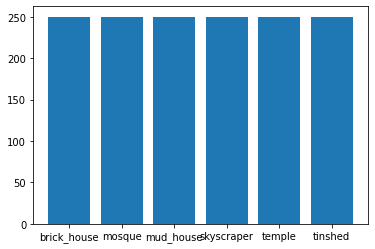

In [7]:
import matplotlib.pyplot as plt
classnames = ['brick_house', 'mosque','mud_house', 'skyscraper', 'temple', 'tinshed']
Numbers = [len(brick_house),len(mosque),len(temple),len(tinshed),len(skyscraper),len(mud_house)]
plt.bar(classnames,Numbers,)
plt.show()

In [8]:
train_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/train'
test_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['brick_house', 'mosque', 'mud_house', 'skyscraper', 'temple', 'tinshed']
['brick_house', 'mosque', 'mud_house', 'skyscraper', 'temple', 'tinshed']


## Dataset Preprocessing using ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
WIDTH=224
HEIGHT=224

In [11]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [12]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=False,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [13]:
train_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [14]:
validation_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [15]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: brick house
- class 1: mosque
- class 2: mud house
- class 3: skyscraper
- class 4: temple
- class 5: tinshed

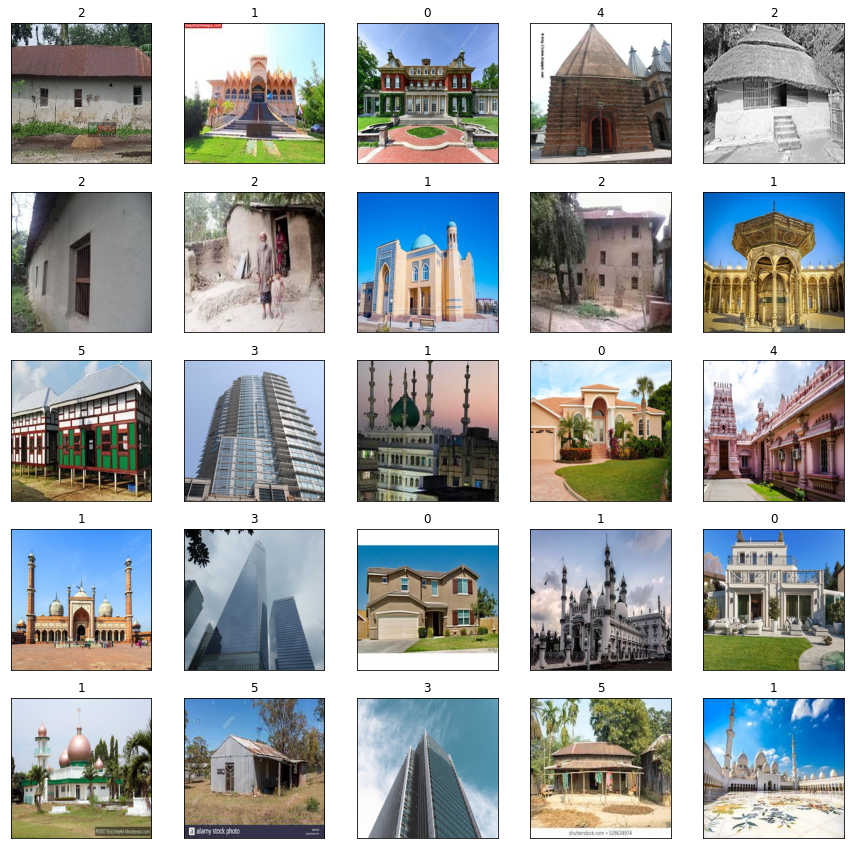

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

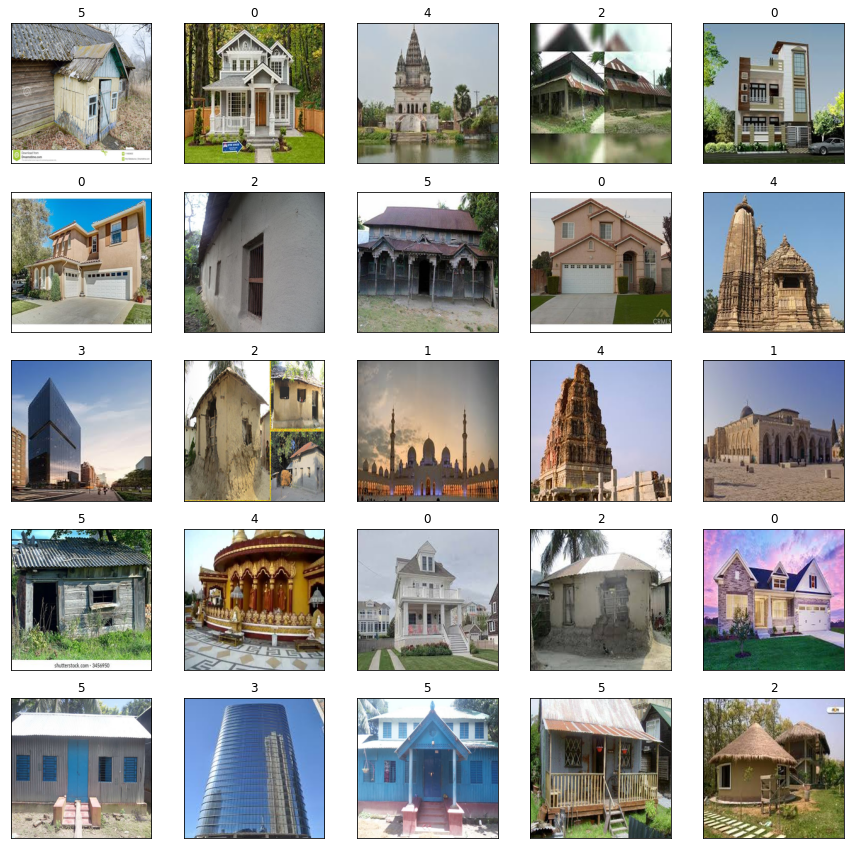

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

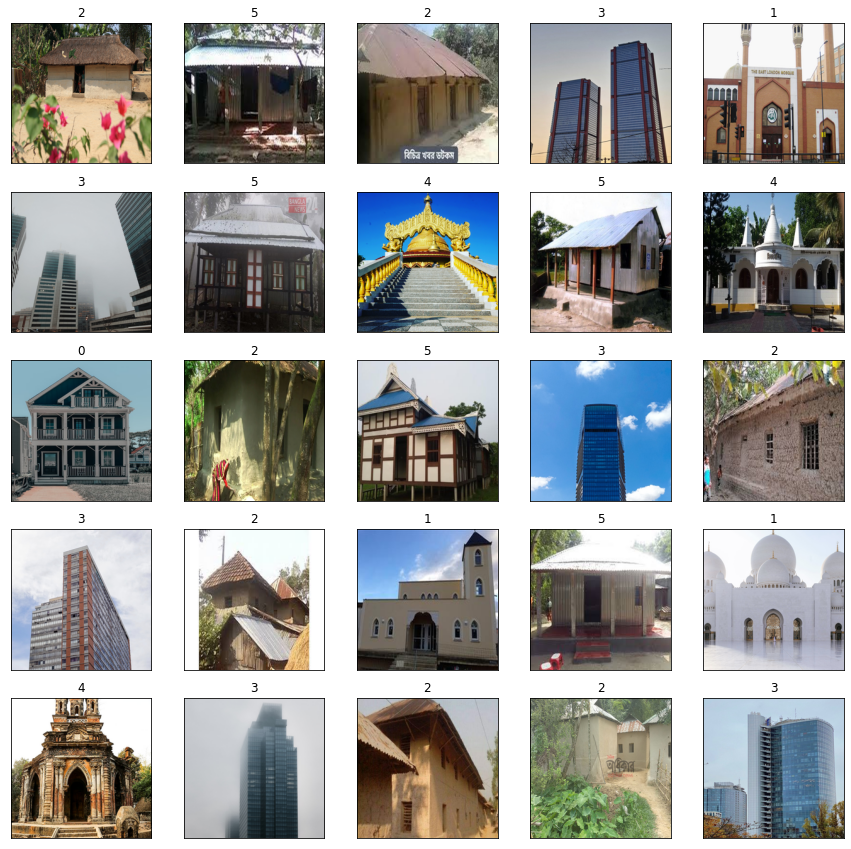

In [16]:
x,y=test_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Inception


In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
import tensorflow as tf

In [18]:
base_model=InceptionV3(input_shape=(224,224,3),include_top=False)

In [19]:
base_model.trainable = False

In [20]:
total_class

6

In [21]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________


In [22]:
#base_model.summary()

## Compile the model

In [23]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [24]:
epochs=50
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Models/InceptionV3_building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [26]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.7208
Epoch 00001: val_loss improved from inf to 0.38476, saving model to Models\InceptionV3_building.model.best.hdf5
30/30 [==============================] - 65s 2s/step - loss: 0.8820 - accuracy: 0.7208 - val_loss: 0.3848 - val_accuracy: 0.8884
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.9125
Epoch 00002: val_loss improved from 0.38476 to 0.31022, saving model to Models\InceptionV3_building.model.best.hdf5
30/30 [==============================] - 67s 2s/step - loss: 0.2923 - accuracy: 0.9125 - val_loss: 0.3102 - val_accuracy: 0.8884
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9333
Epoch 00003: val_loss improved from 0.31022 to 0.24545, saving model to Models\InceptionV3_building.model.best.hdf5
30/30 [==============================] - 69s 2s/step - loss: 0.2119 - accuracy: 0.9333 - val_loss: 0.2454 - val_accu

Epoch 29/50
30/30 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 0.17472
30/30 [==============================] - 72s 2s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.2200 - val_accuracy: 0.9286
Epoch 30/50
30/30 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.17472
30/30 [==============================] - 72s 2s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.1826 - val_accuracy: 0.9509
Epoch 31/50
30/30 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.17472
30/30 [==============================] - 71s 2s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.2167 - val_accuracy: 0.9420
Epoch 32/50
30/30 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.17472
30/30 [======================

## Plot Accuracy and Loss Graph

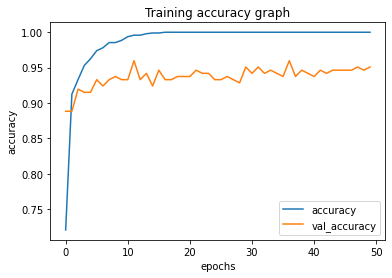

In [27]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

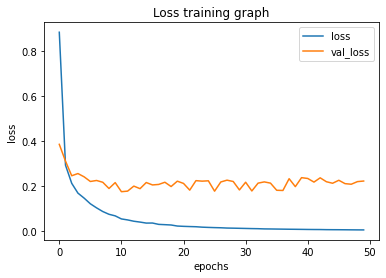

In [28]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [24]:
test_loss,test_accuracy=model.evaluate(test_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

10/10 [==============================] - 10s 1s/step - loss: 0.4066 - accuracy: 0.8700
Test Loss:  0.4066043198108673
Test Accuracy:  0.8700000047683716


In [25]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  87.00000047683716


## Classification Report

In [35]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[2.58654356e-04, 1.97409511e-09, 2.62408029e-09, 4.61441715e-07,
        2.54875305e-11, 1.24289725e-08],
       [6.50379062e-03, 1.33483553e-07, 3.42285711e-09, 1.69168579e-09,
        3.97150046e-07, 5.65309790e-07],
       [4.62222099e-03, 1.99459947e-07, 3.06323273e-07, 3.97934602e-10,
        3.02110334e-06, 9.26651893e-08],
       [2.99990177e-04, 9.67478826e-08, 4.10423172e-06, 3.19585141e-08,
        2.22400249e-08, 2.23076344e-03],
       [9.80163217e-02, 2.31482736e-10, 2.34995710e-07, 1.57963687e-08,
        5.25263999e-07, 2.87334643e-07]], dtype=float32)

In [37]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0,
       0, 5, 0, 0, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 5, 5, 2, 5,
       5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 5, 2, 2, 5], d

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.87


In [39]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.88      0.60      0.71        50
           1       0.94      0.92      0.93        50
           2       0.88      0.92      0.90        50
           3       0.98      1.00      0.99        50
           4       0.98      0.92      0.95        50
           5       0.64      0.86      0.74        50

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



In [40]:
from sklearn.metrics import confusion_matrix
cm_matrix=confusion_matrix(test_dataset.classes,predicted_value)
cm_matrix

array([[30,  0,  0,  0,  0, 20],
       [ 2, 46,  0,  1,  1,  0],
       [ 0,  0, 46,  0,  0,  4],
       [ 0,  0,  0, 50,  0,  0],
       [ 1,  3,  0,  0, 46,  0],
       [ 1,  0,  6,  0,  0, 43]], dtype=int64)

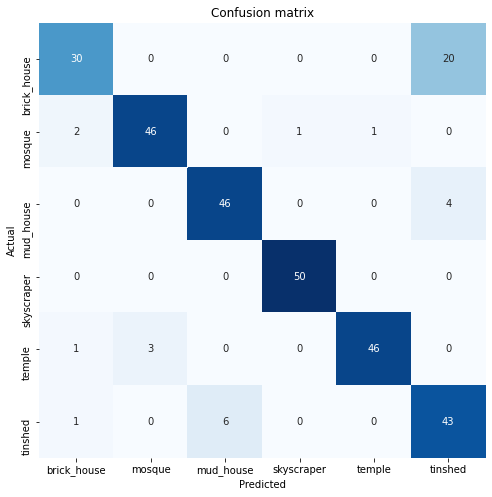

In [41]:
classnames = ['brick_house', 'mosque','mud_house', 'skyscraper', 'temple', 'tinshed']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm_matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Evaluate the model using test image

- class 0: brick house
- class 1: mosque
- class 2: mud house
- class 3: skyscraper
- class 4: temple
- class 5: tinshed

In [26]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[1.02123618e-03 5.26496668e-09 4.44520829e-08 1.47918899e-09
  1.68262488e-08 1.20310115e-05]]
0


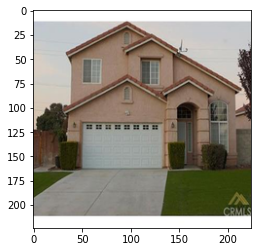

In [27]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/brick_house1.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[4.4715613e-08 9.3268239e-01 9.4325469e-06 3.5655498e-06 1.9082438e-05
  4.1548651e-06]]
1


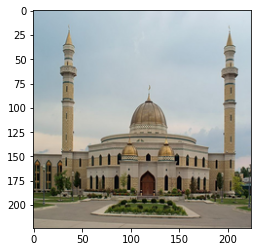

In [28]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mosque0.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.3720028e-06 6.7631841e-02 6.0849811e-07 7.0227280e-08 1.4910102e-04
  2.7217351e-07]]
1


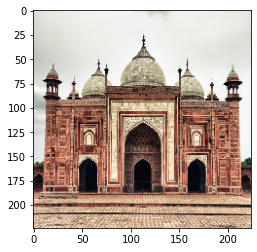

In [29]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mosque35.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))


(1, 224, 224, 3)
[[2.5400348e-07 5.4126048e-07 6.2051648e-01 1.2535416e-08 2.3682864e-07
  6.9047348e-07]]
2


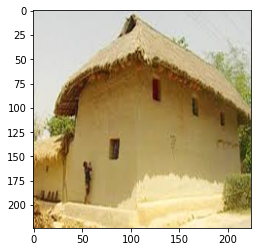

In [30]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mud72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.9103180e-06 1.7173440e-06 6.5816074e-08 1.7720264e-01 8.6609764e-10
  3.2426701e-08]]
3


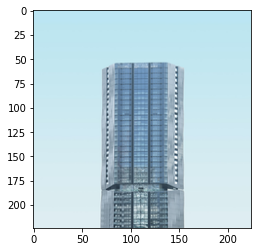

In [31]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/sky79.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[4.3771911e-09 3.2627046e-05 3.6883313e-07 2.5448465e-08 5.6637144e-01
  1.6443745e-06]]
4


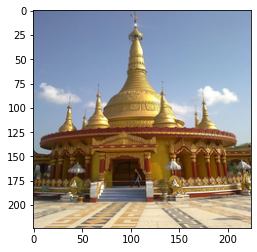

In [32]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/temple33.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.9064080e-06 8.5692375e-10 1.2667230e-07 7.9090690e-08 2.1929939e-06
  1.0285079e-03]]
5


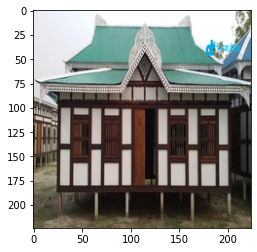

In [33]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/tinshed25.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [38]:
import time
t = time.time()

export_path_keras = "Saved Model/InceptionV3_{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/InceptionV3_0.8700000047683716_model_1619691553.h5


## Reload the model h5 format

In [20]:
model_path='SavedModel/InceptionV3_0.8700000047683716_model_1619691553.h5'

In [17]:
from tensorflow.keras.models import load_model

In [21]:
model_path=model_path
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________


In [23]:
model=reload_model

## Experiment with reload model h5 format

In [41]:
print(len(reload_model.weights))
print(reload_model.output_shape)

378
(None, 6)


## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [42]:
t = time.time()

export_path_sm = "Saved Model/TL InceptionV3 {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

Saved Model/TL InceptionV3 0.8700000047683716 Model 1619691566
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model/TL InceptionV3 0.8700000047683716 Model 1619691566\assets


## Load SavedModel

In [43]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [44]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(inception_v3_input) at 0x1AF66D11EB0>

In [45]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1af714dcfa0>